# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

__In this project our main goal is to find an answer for our research question by carefully analysing the data that we have on hand. For this project we use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. For instance, in one of the questions, known as the Cantril ladder, the poll asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the year 2020 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country. These variables will help us build the analysis around our hypnosis and dig deeper to see if it proves our disproves our project question.__

# Names

- __Ahmad Milad__
- __Patrick Glynn__
- __Yidong Hua__

<a id='research_question'></a>
# Research Question

__Do citizens in countries that have a higher GDP (richer) also live a better life, measured by people's perception of how satisfied they are with their life on a scale and explained by six measurements of happiness: GDP, life support, life expectancy, generosity and corruption rate.__

<a id='background'></a>

## Background & Prior Work

__According to numerous studies, countries/states with a higher GDP produce more carbon than countries/states with lower GDP which has environmental consequences for people who are living in those areas. For example, in the past decade countries like China, US, and India have become the world’s largest carbon emitters. Thus, increase in carbon emissions is an indication of different environmental issues such as weather pollution, increase in sea levels, and unexpected weather phinamnias. These issues directly affect the quality of life in these countries/states. Our goal is to further explore these issues and revival facts that might support our hypothesis. When it comes to quality of life there can be a variety of measures. We will explore the quality of life tradeoff of being developed and enjoying a high level of consumption.__

__References (include links):__
- 1) 
__*Aging  and infectious diseases in the developing world*__ https://academic.oup.com/cid/article/39/1/83/317070
- 2)
__*Potential project data sets*__
https://www.epa.gov/air-emissions-inventories/air-pollutant-emissions-trends-data
https://www.epa.gov/air-trends
https://ourworldindata.org/happiness-and-life-satisfaction

- 3)
__*Information about what is well-being and how do we measure it*__ https://www.cdc.gov/hrqol/wellbeing.htm#:~:text=There%20is%20no%20sole%20determinant,e.g.%2C%20shelter%2C%20income).

- 4)
 __*Environment Data*__
https://data.worldbank.org/indicator/AG.LND.FRST.ZS  - __tree density proportion__
https://data.worldbank.org/indicator/AG.LND.AGRI.ZS - __Agricultural land proportion__

# Hypothesis


__*Citizens in countries/states that have a higher GDP tend to have a lower life quality due to high industrialization.*__

# Dataset(s)

__- Dataset Name: World Happiness Report__
__- Link to the dataset:__https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv
__- Number of observations:__ 156
 
__World Happines Report data set is a great resource for your project. it contains 156 observations and 9 columns and it is sourced from a credible website. The columns in the data sets are as following, ranking, country or region, score, GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. Information in this data set is suitable for our project need.__

__If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.__

# Setup

In [86]:
import pandas  as pd 
import numpy   as np
import seaborn as sns
sns.set(style="white", font_scale=2)
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats

# Data Cleaning

__Describe your data cleaning steps here.__

In [87]:
pd.options.display.max_rows = 2000
df = pd.read_csv ('2019.csv')
# head was used to get a look of what the dataset has
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39
1,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41
2,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34
3,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12
4,5,Netherlands,7.49,1.40,1.52,1.00,0.56,0.32,0.30


In [88]:
ColumnNames = ['Rank','Country','Score','GDP','Support',
                'Longevity','Freedom','Generosity','Corruption', 'Year']
#using seaborn library to make plots look nicer 
sns.set(context = 'talk', style = 'white')
#setting limit on the number of rows displayed 
pd.options.display.max_rows = 7
#rounding dicimals when displaying DataFrames 
pd.set_option ('precision', 2)
#setting plotting size parameter
plt.rcParams ['figure.figsize'] = (17,7)
#dropping null values in the data set 
df = df.dropna (how = 'all')
#making column names nicer 
for i in range (1, len (list(df))):
    df.rename(columns = {df.columns[i]: ColumnNames[i]}, inplace = True)
#adding year column to our dataset 
df['Year'] = '2019'
pd.options.display.max_rows = 2000

__GDP is GDP per capita we shortened it for convienience.__

__The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.__

In [89]:
score = df['Score']
score.describe()

count    156.00
mean       5.41
std        1.11
min        2.85
25%        4.54
50%        5.38
75%        6.18
max        7.77
Name: Score, dtype: float64

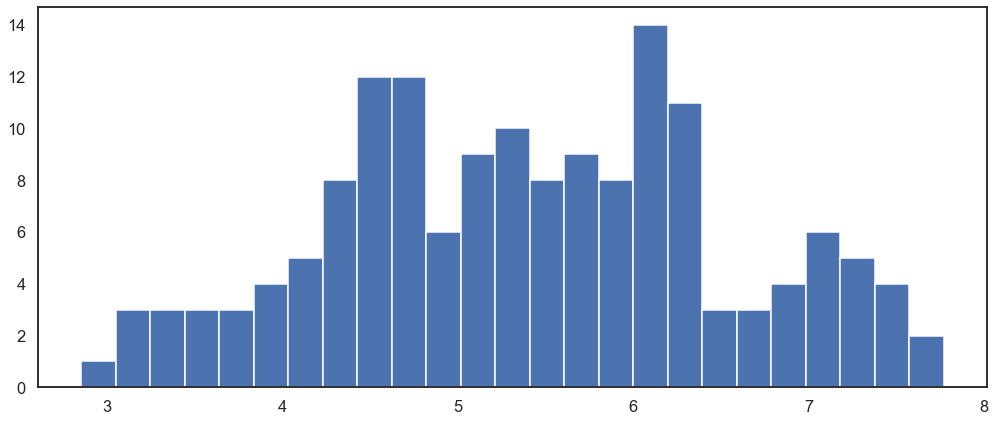

In [90]:
plt.hist(score, bins=25)
plt.show()

In [91]:
gdp = df['GDP']
gdp.describe()
gdp.skew()

-0.3852322563870421

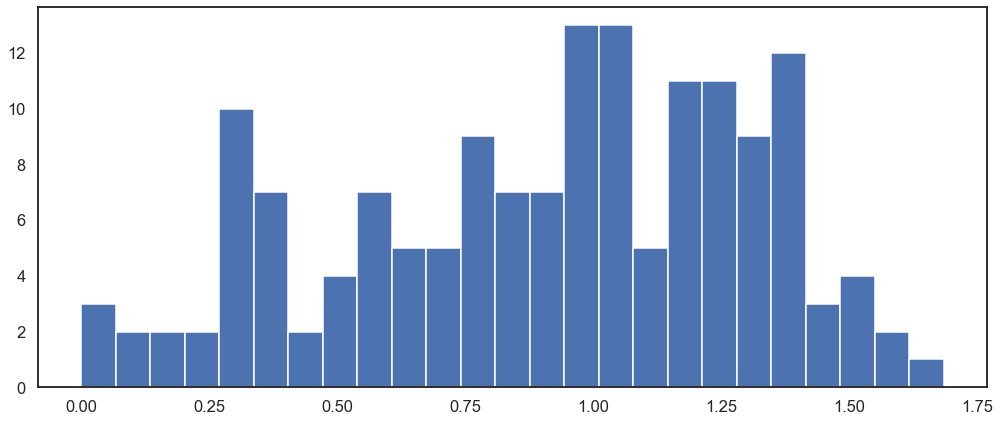

In [92]:
plt.hist(gdp, bins=25)
plt.show()

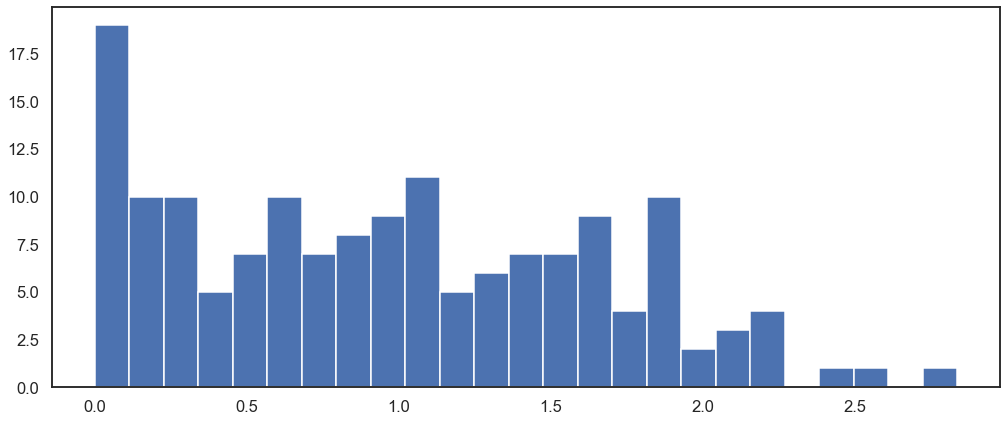

Overall rank      int64
Country          object
Score           float64
GDP             float64
Support         float64
Longevity       float64
Freedom         float64
Generosity      float64
Corruption      float64
Year             object
GDPSq           float64
dtype: object

In [93]:
df['GDPSq'] = df['GDP']**2
gdp = df['GDPSq']

plt.hist(gdp, bins=25)
plt.show()
df['GDPSq'] = pd.to_numeric(df['GDPSq'],errors = 'coerce')
df
df.dtypes

In [94]:
support = df['Support']
support.describe()
support.skew()

-1.1347276019487067

__There seems to be a slight left skew of the Support data by country. To normalize Support data and reduce the skew in our dataset we square our data to make statistical analysis results from this data more valid.__

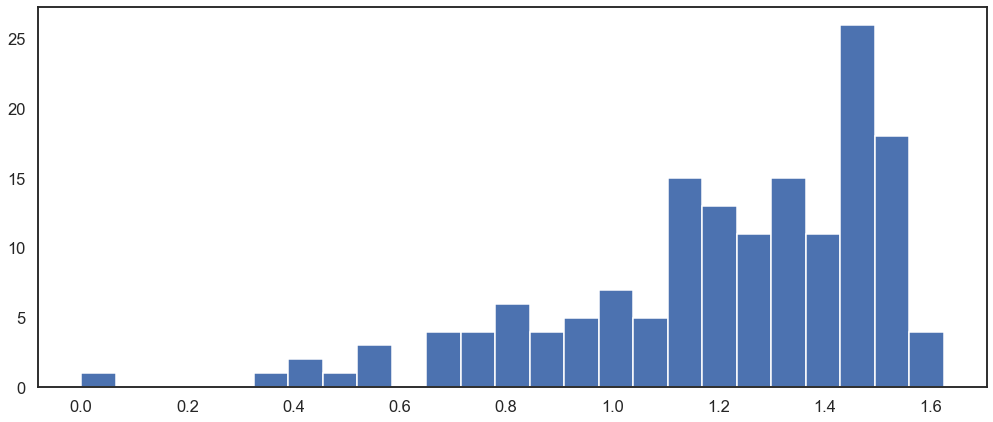

In [95]:
plt.hist(support, bins=25)
plt.show()

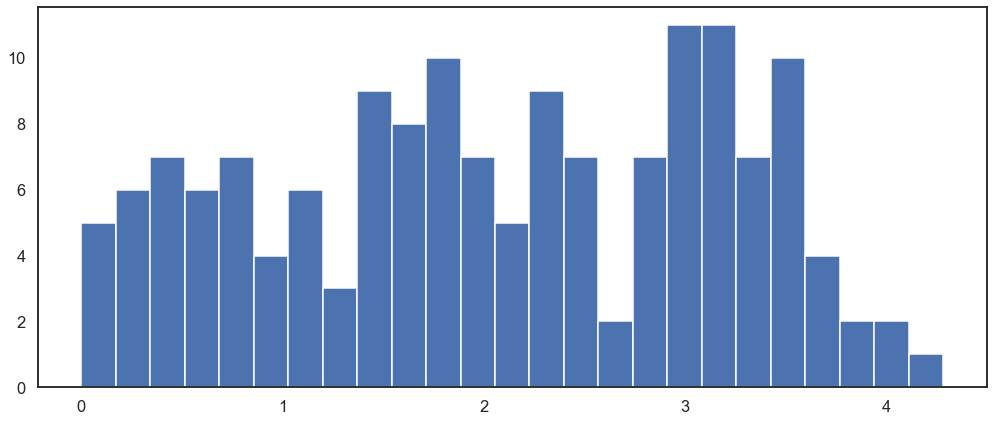

Overall rank      int64
Country          object
Score           float64
GDP             float64
Support         float64
Longevity       float64
Freedom         float64
Generosity      float64
Corruption      float64
Year             object
GDPSq           float64
SupportCubed    float64
dtype: object

In [96]:
df['SupportCubed'] = df['Support']**3
gdp = df['SupportCubed']
plt.hist(gdp, bins=25)
plt.show()
df['SupportCubed'] = pd.to_numeric(df['SupportCubed'],errors = 'coerce')
df
df.dtypes

__Now or data is less skewed in order to make statistical analysis results from this data more valid__

In [97]:
long = df['Longevity']
long.describe()
long.skew()

-0.613840572417414

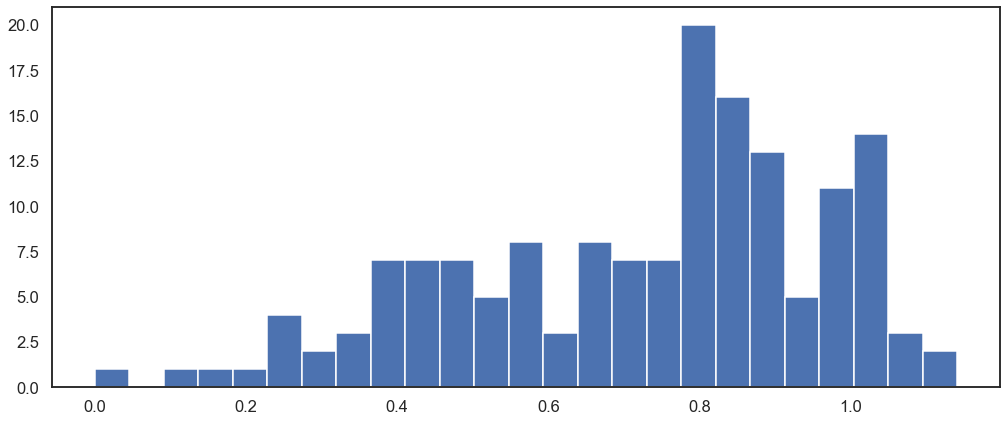

In [98]:
plt.hist(long, bins=25)
plt.show()

__There seems to be a slight left skew of the Longevity data by country. To normalize Longevity data and reduce the skew in our dataset we square our data to make statistical analysis results from this data more valid.__

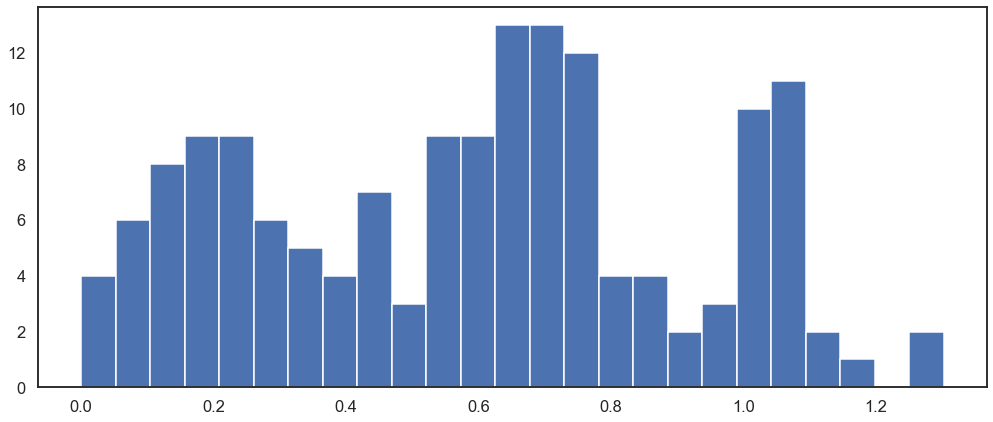

Overall rank      int64
Country          object
Score           float64
GDP             float64
Support         float64
Longevity       float64
Freedom         float64
Generosity      float64
Corruption      float64
Year             object
GDPSq           float64
SupportCubed    float64
LongevitySq     float64
dtype: object

In [99]:
df['LongevitySq'] = df['Longevity']**2
#df['GDPp'] = np.log10(df['GDP'])
gdp = df['LongevitySq']
plt.hist(gdp, bins=25)
plt.show()
df['LongevitySq'] = pd.to_numeric(df['LongevitySq'],errors = 'coerce')
df
df.dtypes

__Now or data is less skewed in order to make statistical analysis results from this data more valid__

In [100]:
free = df['Freedom']
free.describe()

count    156.00
mean       0.39
std        0.14
min        0.00
25%        0.31
50%        0.42
75%        0.51
max        0.63
Name: Freedom, dtype: float64

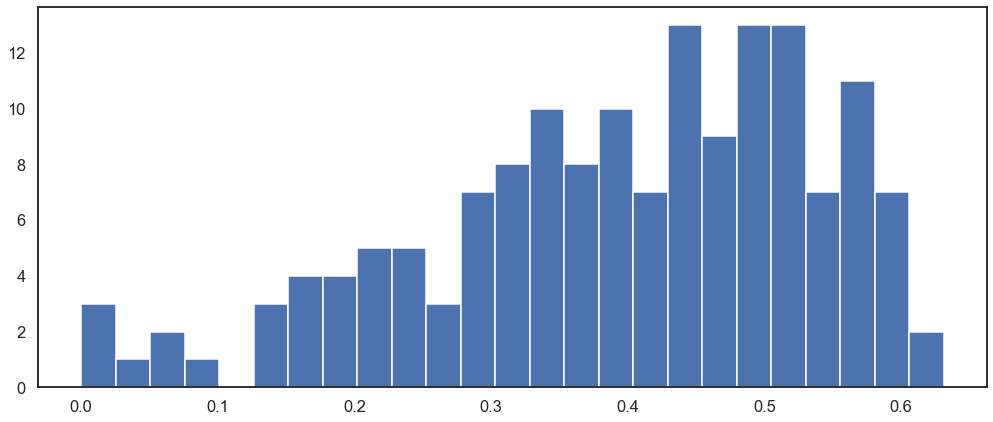

In [101]:
plt.hist(free, bins=25)
plt.show()

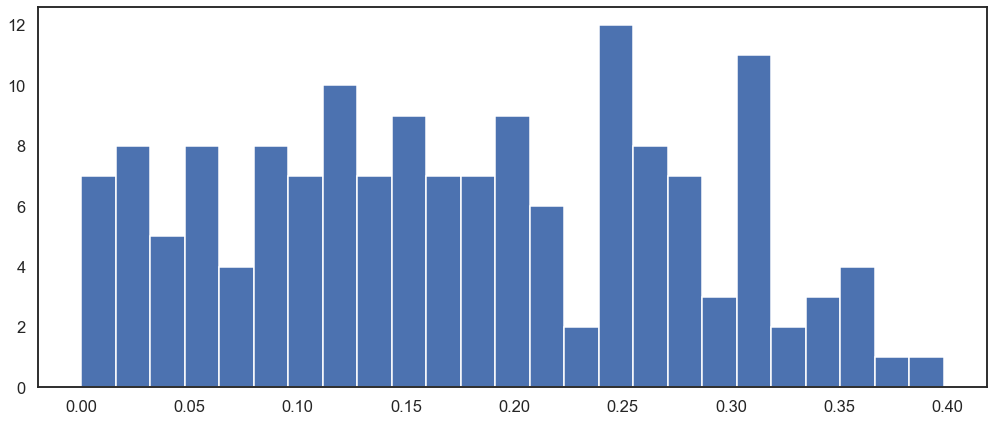

Overall rank      int64
Country          object
Score           float64
GDP             float64
Support         float64
Longevity       float64
Freedom         float64
Generosity      float64
Corruption      float64
Year             object
GDPSq           float64
SupportCubed    float64
LongevitySq     float64
FreedomSq       float64
dtype: object

In [102]:
df['FreedomSq'] = df['Freedom']**2

gdp = df['FreedomSq']
plt.hist(gdp, bins=25)
plt.show()
df['FreedomSq'] = pd.to_numeric(df['FreedomSq'],errors = 'coerce')
df
df.dtypes

In [103]:
gen = df['Generosity']
gen.describe()

count    156.00
mean       0.18
std        0.10
min        0.00
25%        0.11
50%        0.18
75%        0.25
max        0.57
Name: Generosity, dtype: float64

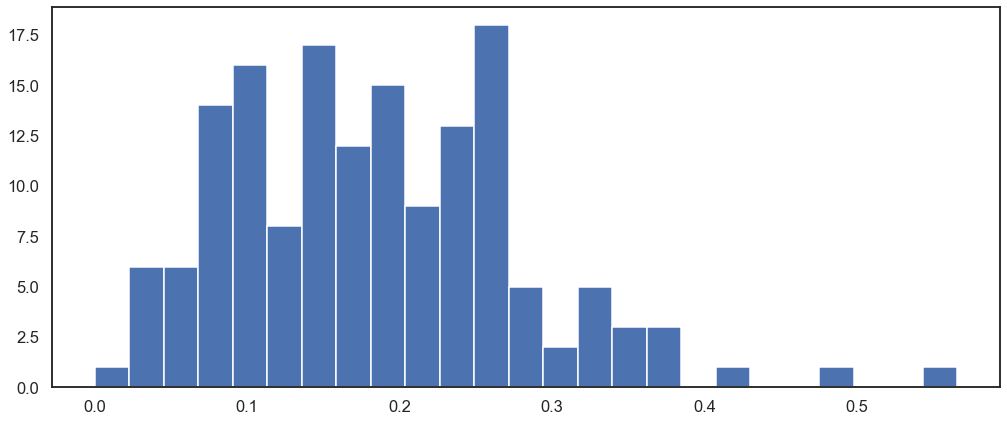

In [104]:
plt.hist(gen, bins=25)
plt.show()

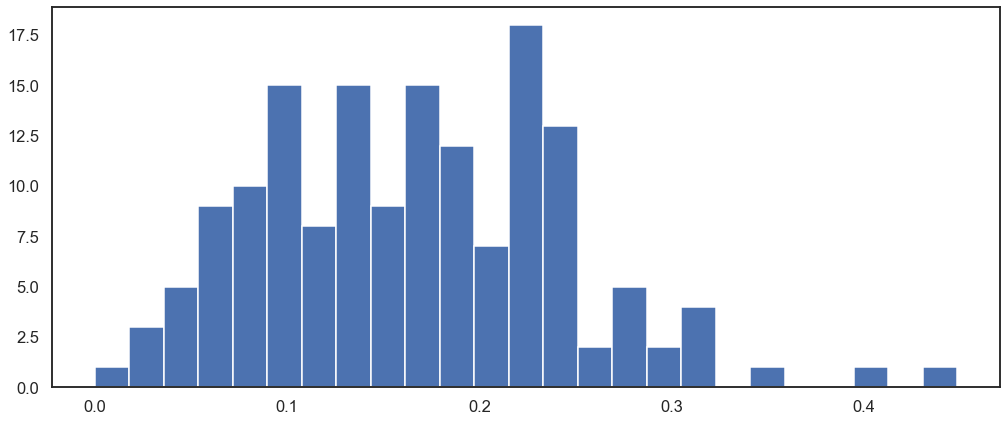

Overall rank      int64
Country          object
Score           float64
GDP             float64
Support         float64
Longevity       float64
Freedom         float64
Generosity      float64
Corruption      float64
Year             object
GDPSq           float64
SupportCubed    float64
LongevitySq     float64
FreedomSq       float64
Genlog          float64
dtype: object

In [105]:
df['Genlog'] = np.log(df['Generosity']+1)

gdp = df['Genlog']
plt.hist(gdp, bins=25)
plt.show()
df['Genlog'] = pd.to_numeric(df['Genlog'],errors = 'coerce')
df
df.dtypes


In [106]:
corr = df['Corruption']
corr.describe()

count    156.00
mean       0.11
std        0.09
min        0.00
25%        0.05
50%        0.09
75%        0.14
max        0.45
Name: Corruption, dtype: float64

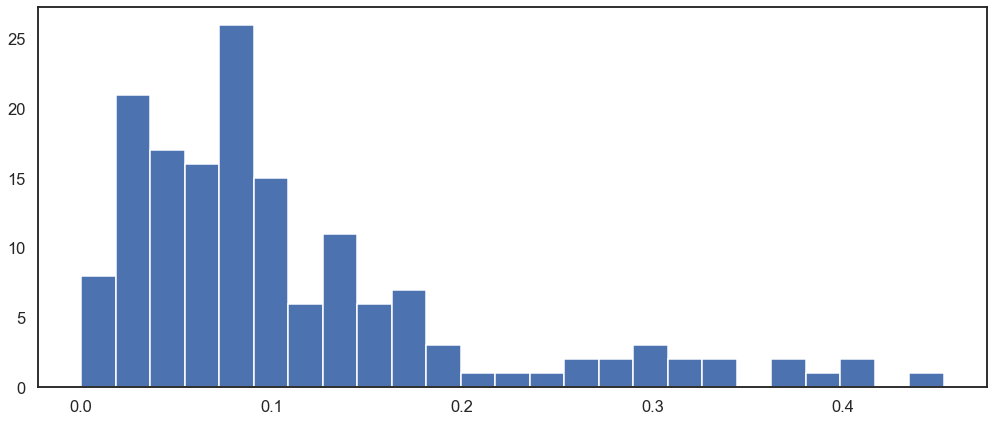

In [107]:
plt.hist(corr, bins=25)
plt.show()

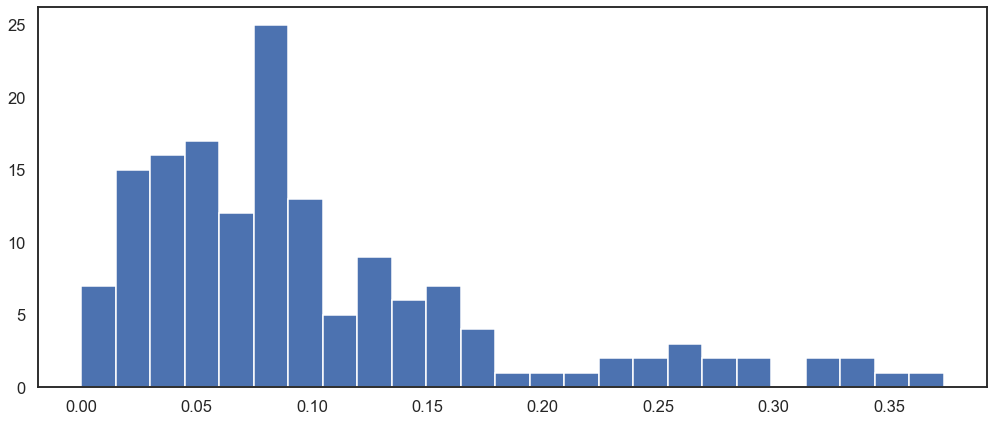

Overall rank      int64
Country          object
Score           float64
GDP             float64
Support         float64
Longevity       float64
Freedom         float64
Generosity      float64
Corruption      float64
Year             object
GDPSq           float64
SupportCubed    float64
LongevitySq     float64
FreedomSq       float64
Genlog          float64
Corrlog         float64
dtype: object

In [108]:
df['Corrlog'] = np.log(df['Corruption']+1)
gdp = df['Corrlog']
plt.hist(gdp, bins=25)
plt.show()
df['Corrlog'] = pd.to_numeric(df['Corrlog'],errors = 'coerce')
df
df.dtypes

# Data Analysis & Results

__Include cells that describe the steps in your data analysis.__

__Our variable GDP per capita is calculated in terms of PPP or Purchasing Power Parity which is adjusted based on the World Banks release of the year 2011 international dollars in 2018. Because 2018 GDP data was not yet availble when this data was collected GDP per capta was calculated after adjustment for population growth. The equation uses the natural log of GDP per capita, as this form fits the data significantly better than GDP per capita.__

In [109]:
outcome, predictors = patsy.dmatrices('Score ~ GDPSq', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     269.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           1.22e-35
Time:                        21:59:03   Log-Likelihood:                -158.69
No. Observations:                 156   AIC:                             321.4
Df Residuals:                     154   BIC:                             327.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1330      0.095     43.724      0.0

Text(0.5, 1.0, '')

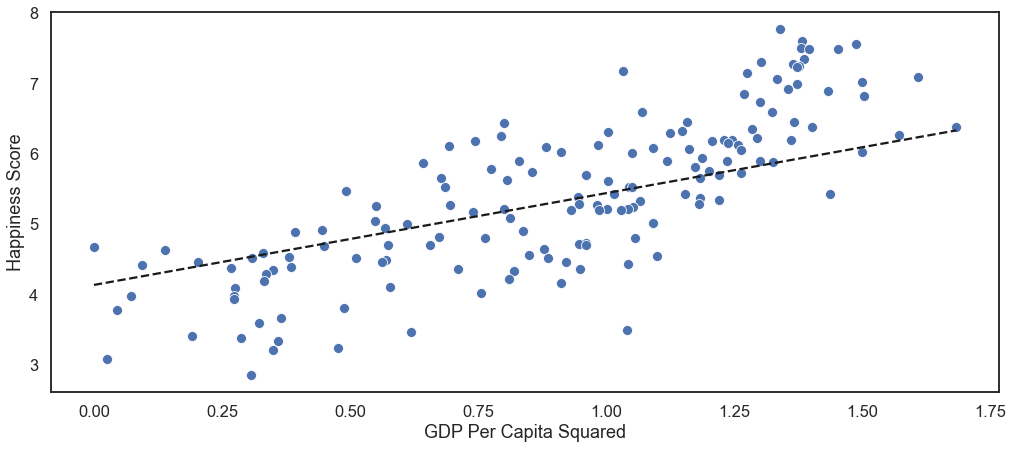

In [110]:
sns.scatterplot(x = 'GDP',y = 'Score', data = df, s=100)
xs = np.linspace(df['GDP'].min(),df['GDP'].max())
ys = 1.3041 * xs + 4.1330 # from linear regression
plt.plot(xs, ys, '--k')

plt.xlabel('GDP Per Capita Squared', size=18)
plt.ylabel('Happiness Score', size=18)
plt.title('')

In [111]:
outcome, predictors = patsy.dmatrices('Score ~ SupportCubed', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     303.6
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           2.98e-38
Time:                        21:59:09   Log-Likelihood:                -152.62
No. Observations:                 156   AIC:                             309.2
Df Residuals:                     154   BIC:                             315.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7288      0.109     34.087   

Text(0.5, 1.0, '')

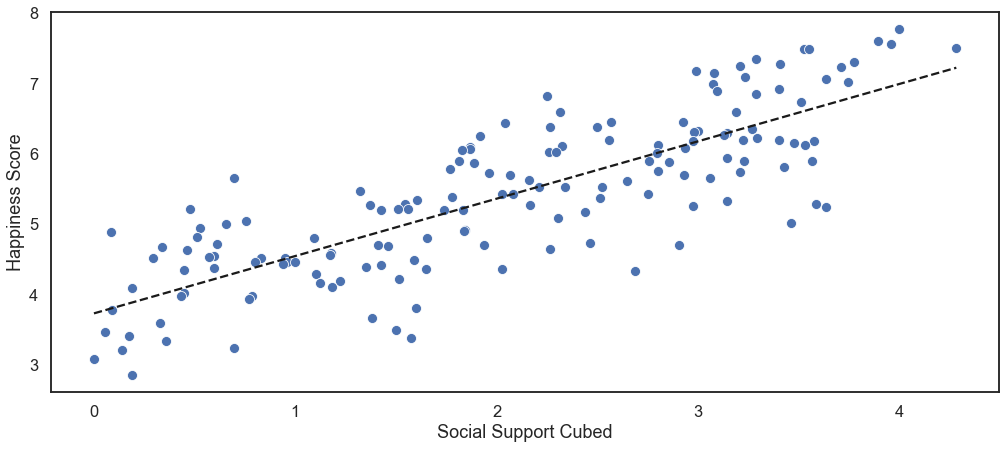

In [112]:
sns.scatterplot(x = 'SupportCubed',y = 'Score', data = df, s=100)
xs = np.linspace(df['SupportCubed'].min(),df['SupportCubed'].max())
ys = 0.8150 * xs + 3.7288 # from linear regression
plt.plot(xs, ys, '--k')

plt.xlabel('Social Support Cubed', size=18)
plt.ylabel('Happiness Score', size=18)
plt.title('')

__As we can see there is a weak linear relationship between GDP and Social Support. Also, in our plot we can see that the country around the origin might be an outlier. In this plot, GDP is the gross domestic product of the given country per person and social support is the national average of the binary responses to the question "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”. From relationship between GDP per capita and Support (social support) we can see that people in countries with a higher GDP have a better social support. The outlier country is Central African Republican and it only has a population of 4 million. There may be discrepencies when the data for social support were collected. It is possible that they only sampled a small amount of people and thus their answers are greatly affected by chance.__

In [113]:
outcome, predictors = patsy.dmatrices('Score ~ LongevitySq', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     277.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           2.87e-36
Time:                        21:59:18   Log-Likelihood:                -157.23
No. Observations:                 156   AIC:                             318.5
Df Residuals:                     154   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7908      0.111     34.218      

Text(0.5, 1.0, '')

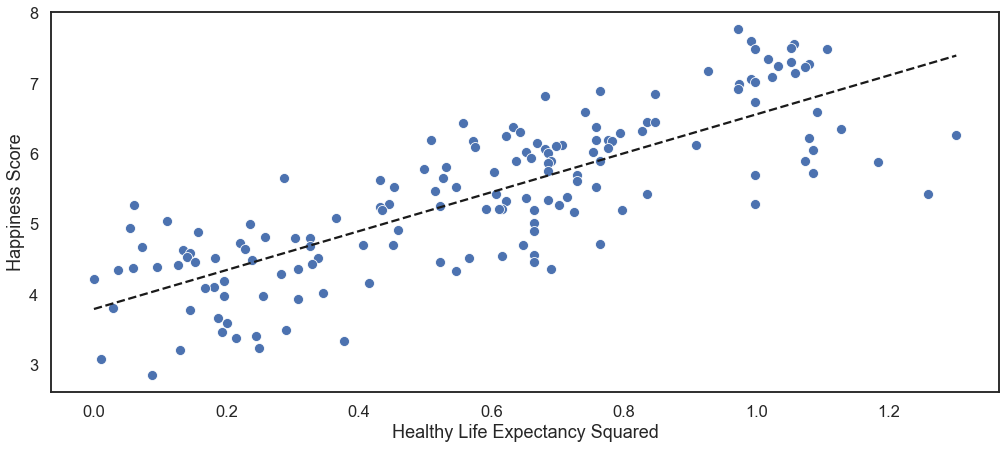

In [114]:
sns.scatterplot(x = 'LongevitySq',y = 'Score', data = df, s=100)
xs = np.linspace(df['LongevitySq'].min(),df['LongevitySq'].max())
ys = 2.7666 * xs + 3.7908 # from linear regression
plt.plot(xs, ys, '--k')

plt.xlabel('Healthy Life Expectancy Squared', size=18)
plt.ylabel('Happiness Score', size=18)
plt.title('')

__Our Variable Longevity is the time series of healthy life expectancy at birth which is constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository. From the figure above, there seem to be a strong linear relationship between GDP per capita and life expectancy of citizens in that country. Such that as GDP increases the life expectancy in that country also increases. The plot also shows that there are some outliers which let might cause issues in analyzing our data. However, we can use this relationship to prove or disprove our hyptosis. Similar to the previous section, here GDP is the gross domestic product of the given country per person and health is data receive from various health resource in specified countries which ranges between 0 to 1.14.__

In [115]:
outcome, predictors = patsy.dmatrices('Score ~ FreedomSq', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     74.60
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           6.85e-15
Time:                        21:59:27   Log-Likelihood:                -206.76
No. Observations:                 156   AIC:                             417.5
Df Residuals:                     154   BIC:                             423.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3150      0.146     29.514      0.0

Text(0.5, 1.0, '')

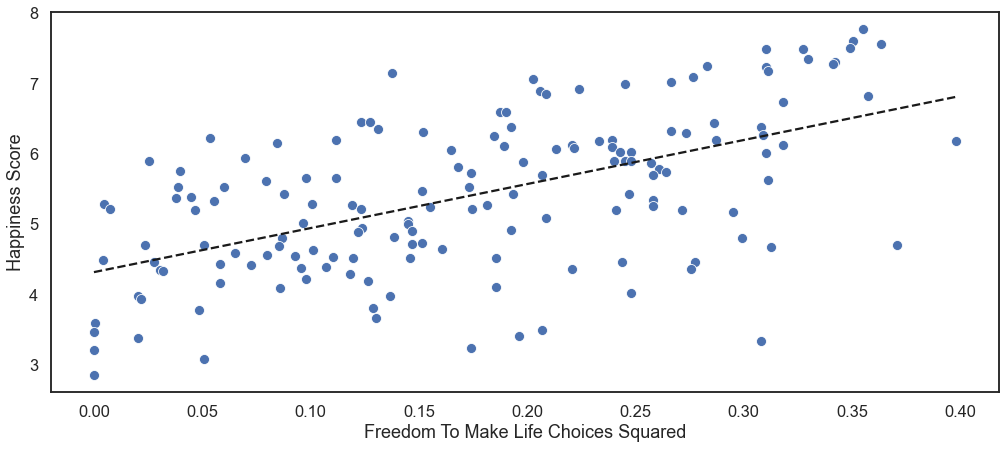

In [116]:
sns.scatterplot(x = 'FreedomSq',y = 'Score', data = df, s=100)
xs = np.linspace(df['FreedomSq'].min(),df['FreedomSq'].max())
ys = 6.2582 * xs + 4.3150 # from linear regression
plt.plot(xs, ys, '--k')

plt.xlabel('Freedom To Make Life Choices Squared', size=18)
plt.ylabel('Happiness Score', size=18)
plt.title('')

__The figure above tells us that there seem to be a weak linear relationship between GDP per capita and freedom of choices. Freedom in our data set was calculated based on the national average of binary responses follwing question asked in survey, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”. From the scatter plot we can also see that there are a lot of randomness (points floating all over the place) in the data and the fitted line may not be accurate. A linear regression is needed to determine whether there is a significant linear relationship between the two.__

In [117]:
outcome, predictors = patsy.dmatrices('Score ~ Generosity', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8905
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.347
Time:                        21:59:35   Log-Likelihood:                -237.12
No. Observations:                 156   AIC:                             478.2
Df Residuals:                     154   BIC:                             484.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2433      0.195     26.872      0.0

Text(0.5, 1.0, '')

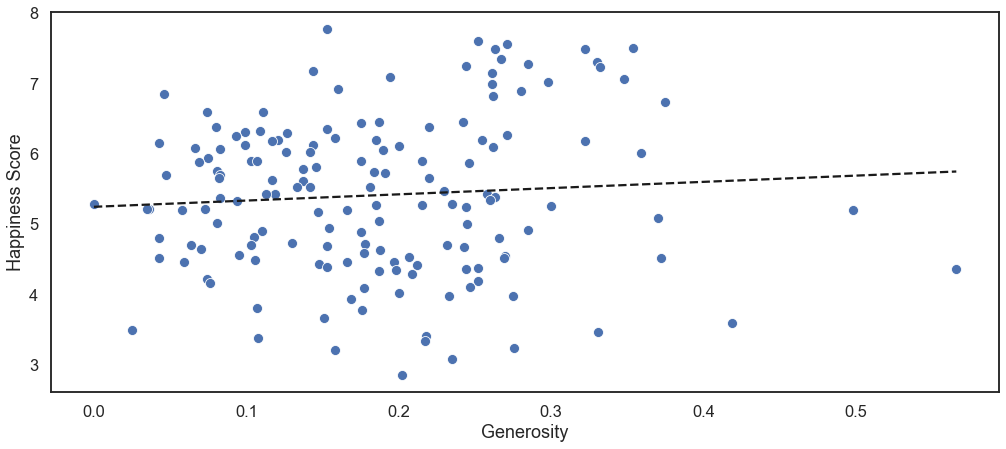

In [118]:
sns.scatterplot(x = 'Generosity',y = 'Score', data = df, s=100)
xs = np.linspace(df['Generosity'].min(),df['Generosity'].max())
ys = 0.8861 * xs + 5.2433 # from linear regression
plt.plot(xs, ys, '--k')

plt.xlabel('Generosity', size=18)
plt.ylabel('Happiness Score', size=18)
plt.title('')

__Generosity is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita. There seems to be a slight negative correlation between generosity and GDP per capita.__

In [119]:
outcome, predictors = patsy.dmatrices('Score ~ Corruption', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     26.90
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           6.65e-07
Time:                        21:59:48   Log-Likelihood:                -225.01
No. Observations:                 156   AIC:                             454.0
Df Residuals:                     154   BIC:                             460.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9049      0.127     38.560      0.0

Text(0.5, 1.0, '')

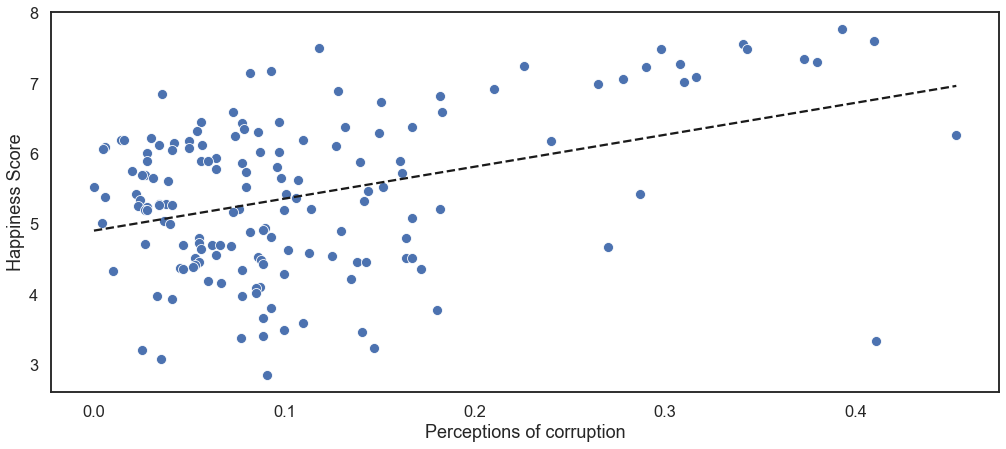

In [120]:
sns.scatterplot(x = 'Corruption',y = 'Score', data = df, s=100)
xs = np.linspace(df['Corruption'].min(),df['Corruption'].max())
ys = 4.5403 * xs + 4.9049 # from linear regression
plt.plot(xs, ys, '--k')

plt.xlabel('Perceptions of corruption', size=18)
plt.ylabel('Happiness Score', size=18)
plt.title('')

__Perceptions of corruption are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure. There seemed to be an exponential relationship between GDP per capita and people's perception of corruption in that country. Such that as GDP increases, there is more percieved corruption. Thus we used log transformation to improve our plot. It turned out that there is still a lot of randomness in our figure, but it looked better than the initial one. Further analysis is needed to determine how GDP affect the perception of Corruption.__

In [121]:
outcome, predictors = patsy.dmatrices('Corruption ~ Freedom', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Corruption   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     36.73
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           1.00e-08
Time:                        22:00:01   Log-Likelihood:                 163.80
No. Observations:                 156   AIC:                            -323.6
Df Residuals:                     154   BIC:                            -317.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0031      0.020     -0.153      0.8

Text(0.5, 1.0, '')

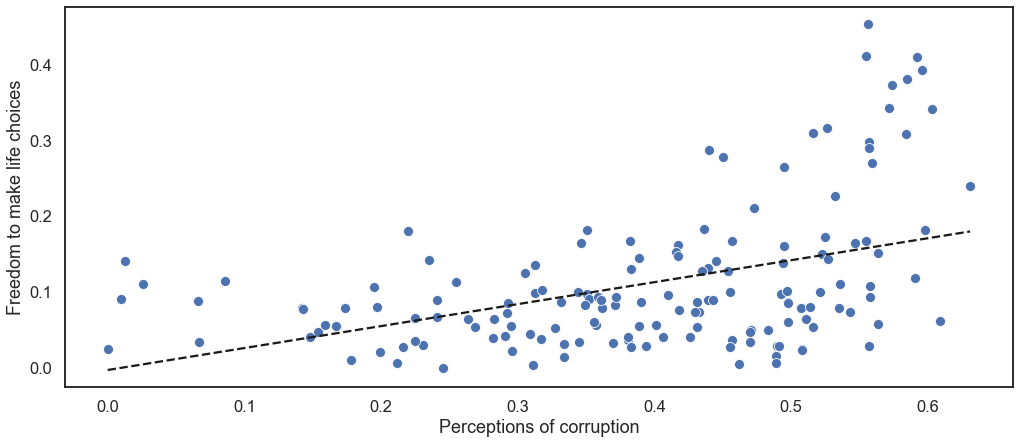

In [125]:
sns.scatterplot(x = 'Freedom',y = 'Corruption', data = df, s=100)
xs = np.linspace(df['Freedom'].min(),df['Freedom'].max())
ys = 0.2895 * xs - 0.0031 # from linear regression
plt.plot(xs, ys, '--k')

plt.xlabel('Perceptions of corruption', size=18)
plt.ylabel('Freedom to make life choices', size=18)
plt.title('')

__As an example, here we decided to look into the relationship between corruption and freedom and we can see that there is a stronger bound between these two variables. In the next step of the project we will deal with the outliers and try to use this relationship to support our project question.__

__Overall, we use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. For instance, in one of the questions, known as the Cantril ladder, the poll asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the year 2020 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country. These variables will help us build the analysis around our hypnosis and dig deeper to see if it proves our disproves our project question.__

In [123]:
# regression analysis for Score and all potential contributing factors
outcome, predictors = patsy.dmatrices('Score ~ LongevitySq + FreedomSq + SupportCubed + GDP + Corruption + Generosity', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     98.47
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           2.64e-49
Time:                        22:00:14   Log-Likelihood:                -112.58
No. Observations:                 156   AIC:                             239.2
Df Residuals:                     149   BIC:                             260.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.1453      0.136     23.191   

In [124]:
# linear regression for Score and more potentially correlated variables(determined by R-square)
outcome, predictors = patsy.dmatrices('Score ~ LongevitySq + FreedomSq + SupportCubed + GDPSq ', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           6.35e-52
Time:                        22:00:19   Log-Likelihood:                -111.53
No. Observations:                 156   AIC:                             233.1
Df Residuals:                     151   BIC:                             248.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.3797      0.098     34.378   

# Ethics & Privacy

   __In our project, data is taken at scale from individuals by countries in survey form. Because of this the data is consensual and individuals do not disclose anything personal. Response collection consists of binary or from a scale of 1 to 10. The survey response rankings are from nationally representative samples. Our data was collected by the Gallup World Poll, which is a reliable and recognized entity that studies all people in the world. As a credible source individuals who participated in their polls are insured privacy.__
   
   __One issue that may lead to bias is the manner in which data is collected. Because it is in the form of a survey in which individuals are asked to rank happiness or in the case of other factors like Social Support which is a binary response, the surveys are limited to those in which they can reach. In small countries and more remote countries with low populations this could potentially result in biases. For example the Central Africa Republic, interestingly enough, had a score of "0" for the binary response measuring Social Support. This was measured by the response of "yes" or "no" to the question of: do you feel supported by friends and family. With a population of less than 5 million it is understandable that perhaps some biases occured when collecting the data in such a small population potentially highlighted by every response being "no" or in the case of the data set "0".__
   
   __We tried to minimize bias by taking out non responses, however it should be recognized that potential bias could occur from geographic and social barriers as well as human error. Furthermore biases could exist where certain isolated ethnic groups were not included, where perhaps geographic barriers existed. Also the differing of sentiments across the world of how happiness is viewed or even what it means to be "supported" or "free" might also lead to bias. Such bias could be a result of religion or cultural views on how one responds or even views happiness. Even though the score is measured on a scale of 1 to 10 there might exist cultural or religious sentiments that may cause a response bias.  We were worried about data bias and availability in developing countries initially, however given the credibility of our source and dataset we could not omit any outliers__

# Conclusion & Discussion

__Initially we had six variables that may be correlated with the Happiness Score, which are GDP per capita, Social Support, Healthy Life Expectancy, Freedom to make life choices, Generosity, and Perception of Corruption. We did a linear regression between individual variables and the happiness score, and it turned out that linear regression for GDP, Social Support, and Longevity had relatively high R-squared values (over 0.6), and regression for Freedom of choices gave an R-squared value of over 0.3. But the R-squared value for Generosity and Perception of Corruption was low. From our linear regression results, we hypothesized that GDP, Support, Longevity, and Freedom were the four main contributors to the Happiness Score and Generosity and Corruption did not contribute much to the overall Happiness Score. We then did a multilinear regression on all variables and it confirmed our hypothesis. When we took out Generosity and Corruption data, the R-squared value for multilinear regression analysis almost didn't change. As a result, we decided to take out the Generosity and Corruption data for our result.__

__In addition, in order to improve the R-squared values and the residuals, we decided to transform our data trying to make them look more like a normal distribution. In the end, we decided to square the GDP, Longevity, and Freedom data, and to cube the Social Support data. We end up getting the following relationship:__

__Happiness Score = 3.3797 + 0.9154 * LongevitySq + 2.2638 * FreedomSq + 0.3621 * SupportCubed + 0.3602 * GDPSq__

# Team Contributions

__To complete this project on time, our team followed our project timeline closely and worked on it collectively. Throughout the quarter we have met at least once a week to work on the checkpoints and discuss the project progress. The reason we decided not to split team roles was the fact that our team has only three members and it was much more efficient for us to work on the project together on predetermined times and dates rather than individual contributions to the project. Due to the scheduling conflicts, from time to time, it was challenging to meet and work on the project collectively, but our team managed to stay committed and complete the tasks in coordination with each other.__